<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/EJERCICIO_WALMART/Ejercicio_PCA_clustering_data_Cristian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
df.head()

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


In [ ]:
df_nonans = df.copy()
df_nonans.dropna(inplace=True)
df_nonans.head()

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
5,10,7/1/68,3/1/98,1.0,40,21,2020 SOUTH MUSKOGEE,Tahlequah,OK,74464,Supercenter,35.923658,-94.97185,7,1,1968


In [ ]:
df_nonans.dtypes

storenum        int64
OPENDATE       object
date_super     object
conversion    float64
st              int64
county          int64
STREETADDR     object
STRCITY        object
STRSTATE       object
ZIPCODE         int64
type_store     object
LAT           float64
LON           float64
MONTH           int64
DAY             int64
YEAR            int64
dtype: object

In [ ]:
df_nonans.drop(['OPENDATE', 'date_super', 'STREETADDR', 'STRCITY', 'STRSTATE','type_store'], axis='columns', inplace=True)


In [ ]:
df_nonans['conversion'].unique()

array([1., 0.])

varianza explicada acumulada =[ 29.96540273  49.05169354  61.89097376  72.90042761  82.02558791
  89.77789524  95.62396707  98.57335388  99.39559842 100.        ]
Dimensionalidad datos en espacio PCA reducido = (1946, 6)


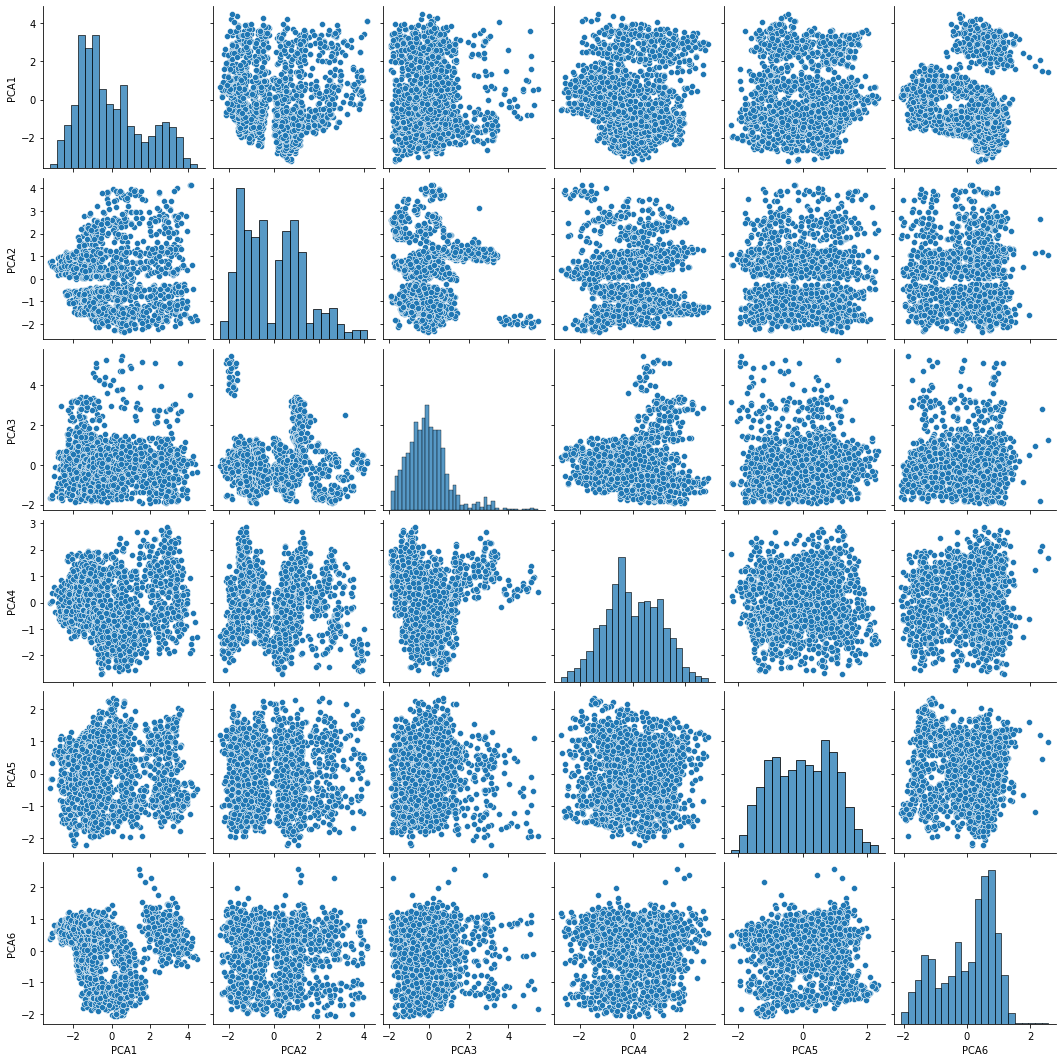

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

X = df_nonans

# scale data:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

# PCA decomopositon:
from sklearn import decomposition
n_variables = df_copy.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

# project data into PCA space:
Xproj = pca.transform(XS)

# Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:
ndim_reducida = 6 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

df_PCA = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6'])
sns.pairplot(df_PCA)
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn import mixture

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='tied').fit(df_PCA)
    bic.append(gmm.bic(df_PCA))
    
print(bic)
print(bic[8])

#idx_winner = np.argmin(bic)

[36732.958766761105, 35153.90039882275, 35149.572977919175, 34918.5059716312, 34510.29805540398, 34345.662660756694, 33666.10133585131, 33529.300010748506, 33274.784092452064, 33160.27228517689]
33274.784092452064


...and the winner is GMM model G = 9 with BIC 33274.784092452064


<Figure size 864x432 with 0 Axes>

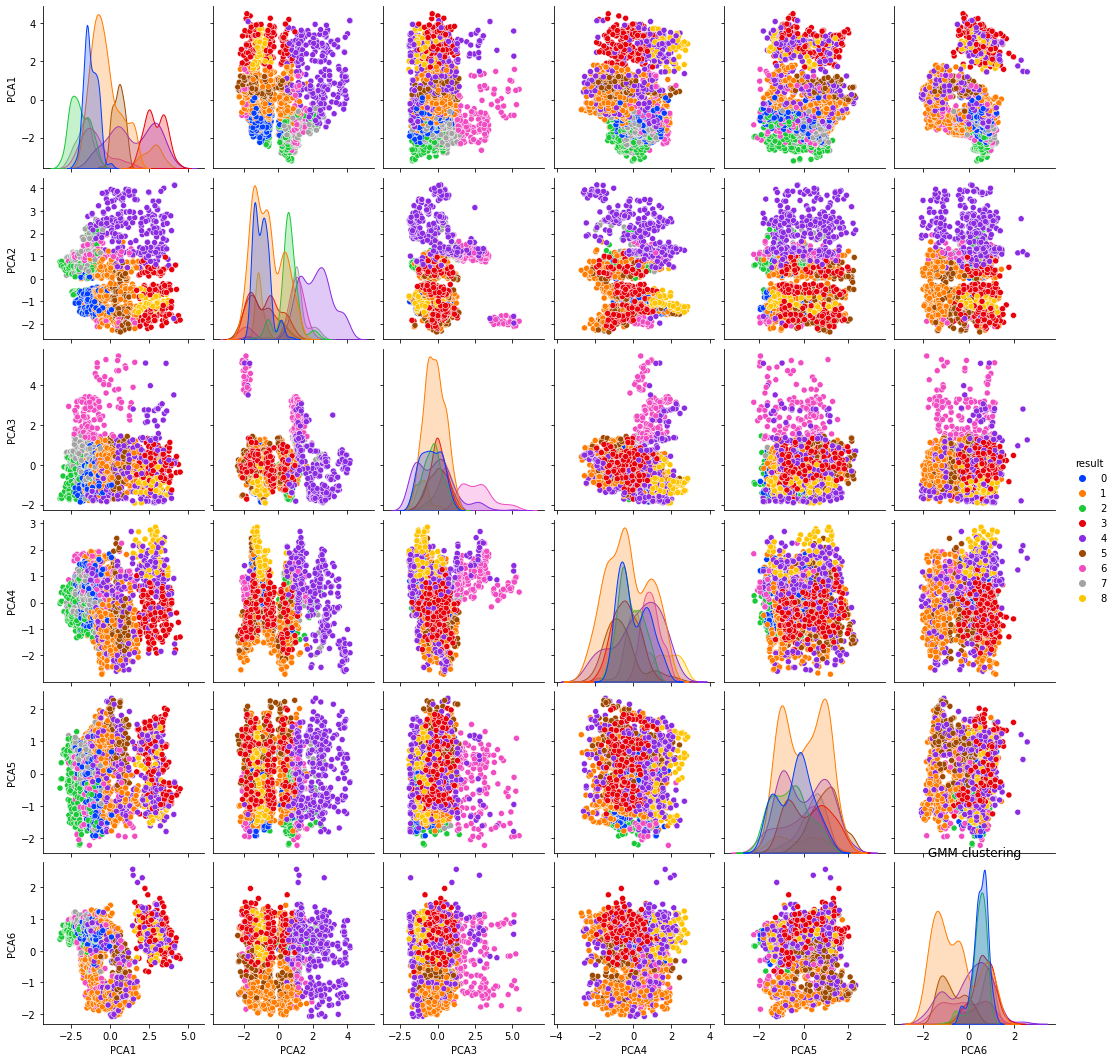

In [ ]:
idx_winner = 8

print('...and the winner is GMM model G = {} with BIC {}'.format(idx_winner+1, bic[idx_winner]))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='tied').fit(df_PCA)

fig = plt.figure(figsize=(12,6))
y_pred_gmm = gmm.fit_predict(df_PCA)
df_PCA['result']=y_pred_gmm
sns.pairplot(df_PCA,hue='result', palette='bright')
#sns.pairplot(df_PCA,hue='result')
plt.title("GMM clustering")
plt.show()

In [ ]:
#df_nonans.loc[df_PCA['result']==6]
print(df_nonans.shape)
print(df_PCA.shape)

(1946, 10)
(1946, 7)


In [ ]:
#yn_d = np.where(y_pred_gmm==6)
#df_nonans.loc[yn_d[0]]
#print(np.array(yn_d[0]))

KeyError: ignored

In [ ]:
np.where(y_pred_gmm==6)
np.unique(y_pred_gmm)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

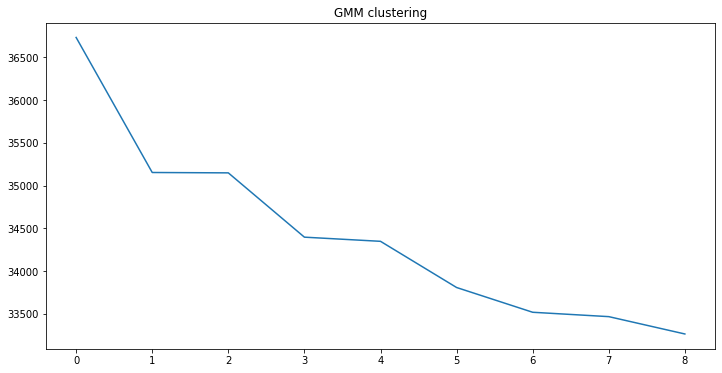

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.plot(bic[:9])
plt.title("GMM clustering")
plt.show()